In [1]:
from google.colab import files
uploaded = files.upload()

Saving pima-indians-diabetes.csv to pima-indians-diabetes.csv


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import io

df = pd.read_csv(io.BytesIO(uploaded['pima-indians-diabetes.csv']))
df.head()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


# FEATURE CORRELATION

                          Pregnancies   Glucose  ...       Age     Class
Pregnancies                  1.000000  0.128846  ...  0.544018  0.221087
Glucose                      0.128846  1.000000  ...  0.262408  0.465856
BloodPressure                0.141197  0.152498  ...  0.239571  0.064882
SkinThickness               -0.082495  0.056381  ... -0.115873  0.073265
Insulin                     -0.072999  0.332383  ... -0.040942  0.131984
BMI                          0.017518  0.220955  ...  0.035911  0.292695
DiabetesPedigreeFunction    -0.033927  0.136903  ...  0.032738  0.173245
Age                          0.544018  0.262408  ...  1.000000  0.236417
Class                        0.221087  0.465856  ...  0.236417  1.000000

[9 rows x 9 columns]


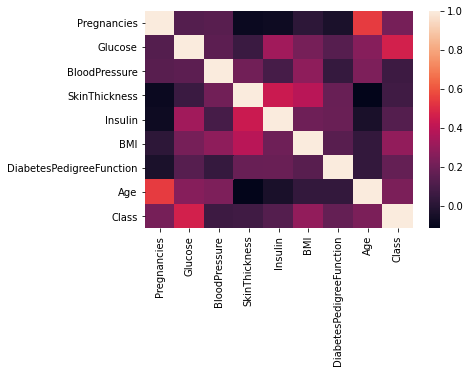

In [3]:
corr = df.corr()
print(corr)
sns.heatmap(corr, 
         xticklabels=corr.columns, 
         yticklabels=corr.columns)

In [0]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')
imputer = imputer.fit(df.loc[:, df.columns != 'Class'])

df.loc[:, df.columns != 'Class'] = imputer.transform(df.loc[:, df.columns != 'Class'])

In [7]:
from sklearn.model_selection import train_test_split

y_label = df['Class']
X_feature = df.loc[:, df.columns != 'Class']

X_train, X_test, y_train, y_test = train_test_split(X_feature, y_label, test_size=0.3, random_state=30)

X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
191,7.0,159.0,66.0,0.0,0.0,30.4,0.383,36.0
87,15.0,136.0,70.0,32.0,110.0,37.1,0.153,43.0
109,3.0,171.0,72.0,33.0,135.0,33.3,0.199,24.0
419,1.0,119.0,88.0,41.0,170.0,45.3,0.507,26.0
402,9.0,72.0,78.0,25.0,0.0,31.6,0.280,38.0


# SUPPORT VECTOR MACHINE

In [0]:
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import classification_report

In [9]:
clf = SVC(kernel="linear")
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("mislabeled points out of a total %d points : %d" %(X_test.shape[0],(y_test != y_pred).sum()))
print('Accuracy of SVM classifier on test set: {:.2f}'.format(clf.score(X_test, y_test)))

mislabeled points out of a total 231 points : 57
Accuracy of SVM classifier on test set: 0.75


In [10]:
cmsvm = metrics.confusion_matrix(y_test, y_pred)
print(cmsvm)

[[120  23]
 [ 34  54]]


In [11]:
print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.78      0.84      0.81       143
         1.0       0.70      0.61      0.65        88

    accuracy                           0.75       231
   macro avg       0.74      0.73      0.73       231
weighted avg       0.75      0.75      0.75       231



In [12]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(clf, X_feature, y_label, cv=10)
print(scores)

[0.71428571 0.77922078 0.77922078 0.75324675 0.74025974 0.77922078
 0.79220779 0.80263158 0.75       0.81578947]


# NAIVE BAYES

In [13]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)

print("Number of mislabeled points out of a total %d points : %d" %(X_test.shape[0],(y_test != y_pred).sum()))
print('Accuracy of Naive Bayes classifier on test set: {:.2f}'.format(gnb.score(X_test, y_test)))

Number of mislabeled points out of a total 231 points : 57
Accuracy of Naive Bayes classifier on test set: 0.75


In [14]:
from sklearn import metrics

cmnb = metrics.confusion_matrix(y_test, y_pred)
print(cmnb)

[[114  29]
 [ 28  60]]


In [15]:
print(classification_report(y_test, gnb.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.80      0.80      0.80       143
         1.0       0.67      0.68      0.68        88

    accuracy                           0.75       231
   macro avg       0.74      0.74      0.74       231
weighted avg       0.75      0.75      0.75       231



In [16]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(gnb, X_feature, y_label, cv=10)
print(scores)

[0.71428571 0.76623377 0.79220779 0.72727273 0.7012987  0.79220779
 0.75324675 0.80263158 0.72368421 0.77631579]


# LOGISTIC REGRESSION

In [17]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

print("Number of mislabeled points out of a total %d points : %d" %(X_test.shape[0],(y_test != y_pred).sum()))
print('Accuracy of Logistic Regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Number of mislabeled points out of a total 231 points : 54
Accuracy of Logistic Regression classifier on test set: 0.77


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [18]:
from sklearn import metrics

cmlreg = metrics.confusion_matrix(y_test, y_pred)
print(cmlreg)

[[121  22]
 [ 32  56]]


In [19]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(logreg, X_feature, y_label, cv=10)
print(scores)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


[0.74025974 0.80519481 0.79220779 0.72727273 0.74025974 0.75324675
 0.80519481 0.82894737 0.71052632 0.82894737]


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [20]:
print(classification_report(y_test, logreg.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.79      0.85      0.82       143
         1.0       0.72      0.64      0.67        88

    accuracy                           0.77       231
   macro avg       0.75      0.74      0.75       231
weighted avg       0.76      0.77      0.76       231



# K-NEAREST NEIGHBOR

In [21]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print("mislabeled points out of a total %d points : %d" %(X_test.shape[0],(y_test != y_pred).sum()))
print('Accuracy of KNN classifier on test set: {:.2f}'.format(knn.score(X_test, y_test)))

mislabeled points out of a total 231 points : 64
Accuracy of KNN classifier on test set: 0.72


In [22]:
cmknn = metrics.confusion_matrix(y_test, y_pred)
print(cmknn)

[[113  30]
 [ 34  54]]


In [23]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(knn, X_feature, y_label, cv=10)
print(scores)

[0.68831169 0.80519481 0.7012987  0.67532468 0.68831169 0.74025974
 0.7012987  0.80263158 0.71052632 0.73684211]


In [24]:
print(classification_report(y_test, knn.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.77      0.79      0.78       143
         1.0       0.64      0.61      0.63        88

    accuracy                           0.72       231
   macro avg       0.71      0.70      0.70       231
weighted avg       0.72      0.72      0.72       231

